<a href="https://colab.research.google.com/github/2405vaishnavi/2405vaishnavi/blob/main/Crop_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestRegressor for regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# Load Dataset
# print("Data Set ")
data = pd.read_csv("/content/crop_yield.csv")
data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [ ]:
# Dimension of Dataset
print("Shape of a Data")
dim = data.shape
dim

Shape of a Data


(19689, 10)

In [ ]:
# Datatypes
print("Data Types of each Attribute")
data.dtypes

Data Types of each Attribute


Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
# Peek at the Dataset
print("Top values from a dataset")
data.head()

Top values from a dataset


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
# Statistical Summary
print("Describe method")
data.describe()

Describe method


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
# Check missing values
print("Check Missing values ")
nullValue = data.isnull().sum()
nullValue

Check Missing values 


Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [ ]:
# Crop Distribution
data.groupby('Crop').size()

Crop
Arecanut                  162
Arhar/Tur                 508
Bajra                     524
Banana                    245
Barley                    297
Black pepper              126
Cardamom                   74
Cashewnut                 134
Castor seed               300
Coconut                   172
Coriander                 199
Cotton(lint)              476
Cowpea(Lobia)             134
Dry chillies              419
Garlic                    250
Ginger                    323
Gram                      490
Groundnut                 725
Guar seed                  63
Horse-gram                371
Jowar                     513
Jute                      181
Khesari                    75
Linseed                   308
Maize                     975
Masoor                    324
Mesta                     210
Moong(Green Gram)         740
Moth                      110
Niger seed                192
Oilseeds total             29
Onion                     454
Other  Rabi pulses        355
Other

In [ ]:
data.groupby('Crop_Year').size()

Crop_Year
1997     410
1998     646
1999     650
2000     772
2001     750
2002     815
2003     801
2004     787
2005     811
2006     823
2007     828
2008     847
2009     865
2010     859
2011     907
2012     894
2013     976
2014     965
2015     998
2016    1036
2017    1070
2018    1063
2019    1079
2020      37
dtype: int64

In [ ]:
data.groupby('State').size()

State
Andhra Pradesh       1266
Arunachal Pradesh     292
Assam                 731
Bihar                 896
Chhattisgarh          915
Delhi                 203
Goa                   246
Gujarat               817
Haryana               631
Himachal Pradesh      616
Jammu and Kashmir     631
Jharkhand             270
Karnataka            1432
Kerala                534
Madhya Pradesh        845
Maharashtra           770
Manipur               444
Meghalaya             649
Mizoram               416
Nagaland              689
Odisha                760
Puducherry            670
Punjab                397
Sikkim                226
Tamil Nadu            822
Telangana             397
Tripura               441
Uttar Pradesh         825
Uttarakhand           764
West Bengal          1094
dtype: int64

In [ ]:
# Analysis total production of crop per year
print("Analysis total production of crop per year")
total_prod = data.groupby('Crop_Year')['Production'].sum().sort_values(ascending=False)
print(total_prod)

Analysis total production of crop per year
Crop_Year
2011    19260119964
2015    18329298670
2019    18272602364
2018    17933914698
2014    17729042495
2013    17040254359
2009    16604163998
2016    16357287264
2008    16165771744
2017    15873843241
2006    15702675600
2005    14951210018
2007    14471191552
2004    13817065380
2012    13030757834
2002    12409349456
2003    12313711969
2010    11952654246
2000     9562470060
2001     9314563490
1999     8550025528
1998     7868086697
1997     6087009873
2020       10177226
Name: Production, dtype: int64


In [ ]:
# Analysis total production of crop
print("Analysis total production of crop")
total_prod = data.groupby('Crop')['Production'].sum().sort_values(ascending=False)
print(total_prod)

Analysis total production of crop
Crop
Coconut                  308751970278
Sugarcane                  7236536755
Rice                       2229301180
Wheat                      1810754504
Potato                      629688035
Cotton(lint)                457831414
Maize                       410911181
Jute                        230423821
Banana                      226471979
Soyabean                    191659664
Groundnut                   148626325
Jowar                       141915435
Gram                        134316823
Tapioca                     130884693
Onion                       121700945
Bajra                       118137047
Rapeseed &Mustard            78148914
Arhar/Tur                    60913833
Ragi                         44215960
Niger seed                   40641053
Arecanut                     39144261
Urad                         35268564
Dry chillies                 26009838
Castor seed                  24049211
Moong(Green Gram)            22490489
Tobacco    

In [ ]:
# Group the data by 'Year', 'Season', and 'Crop' and sum the 'Production' for each group

year_season_crop_production = data.groupby(['Crop_Year', 'Season', 'Crop'])['Production'].sum().reset_index()
sorted_year_season_crop_production = year_season_crop_production.sort_values(by=['Crop_Year', 'Production'], ascending=[False,False])
sorted_year_season_crop_production

,Crop_Year,Season,Crop,Production
3322,2020,Whole Year,Sugarcane,7970299
3313,2020,Rabi,Wheat,937003
3298,2020,Kharif,Rice,669372
3297,2020,Kharif,Ragi,125898
3300,2020,Kharif,Small millets,65289
...,...,...,...,...
117,1997,Winter,Maize,136
12,1997,Kharif,Coconut,40
21,1997,Kharif,Linseed,22
42,1997,Rabi,Castor seed,15


In [ ]:
# Group the data by 'Crop' and sum the 'Production' for each crop
crop_prod = data.groupby('Crop')['Production'].sum()
high_crop = crop_prod.idxmax()
high_value = crop_prod.max()
low_crop = crop_prod.idxmin()
low_value = crop_prod.min()

In [ ]:
print(f"The crop with the highest production is {high_crop} with a production of {high_value}")
print(f"The crop with the lowest production is {low_crop} with a production of {low_value}")

The crop with the highest production is Coconut  with a production of 308751970278
The crop with the lowest production is Other Summer Pulses with a production of 8394


In [ ]:
# Analysis which states are the top producers of specific crops
unique_crops = data['Crop'].unique()
state_data = []

for crop in unique_crops:
    crop_data = data[data['Crop'] == crop]
    state_production = crop_data.groupby('State')['Production'].sum()
    top_producing_states = state_production.sort_values(ascending=False)
    top_state = top_producing_states.index[0]
    state_data.append({'Crop': crop, 'Top Producing State': top_state})

df = pd.DataFrame(state_data)
df

,Crop,Top Producing State
0,Arecanut,Karnataka
1,Arhar/Tur,Maharashtra
2,Castor seed,Gujarat
3,Coconut,Kerala
4,Cotton(lint),Gujarat
5,Dry chillies,Andhra Pradesh
6,Gram,Madhya Pradesh
7,Jute,West Bengal
8,Linseed,Madhya Pradesh
9,Maize,Karnataka


In [ ]:
print("crop production vary with different seasons")
seasonal_production = data.groupby('Season')['Production'].sum().sort_values(ascending=False)
seasonal_production_df = pd.DataFrame(seasonal_production)
seasonal_production_df

crop production vary with different seasons


,Production
Season,
Whole Year,314452748974
Kharif,5402484780
Rabi,2837368229
Winter,586507936
Summer,243731156
Autumn,84406651


In [ ]:
# Analysis average yield for different crops
print("Analysis average yield for different crops")
average_yield_by_crop = data.groupby('Crop')['Yield'].mean().sort_values(ascending=False)
average_yield_by_crop_df = pd.DataFrame(average_yield_by_crop)
average_yield_by_crop_df.head()

Analysis average yield for different crops


,Yield
Crop,
Coconut,8652.000199
Sugarcane,51.727439
Banana,26.851128
Tapioca,16.667301
Potato,13.331718


In [ ]:
# Calculate the correlation between 'Annual_Rainfall' and 'Production'
correlation = data['Annual_Rainfall'].corr(data['Production'])
print(f"Correlation between Annual Rainfall and Crop Production: {correlation}")

Correlation between Annual Rainfall and Crop Production: 0.029879391233072337


Visualization


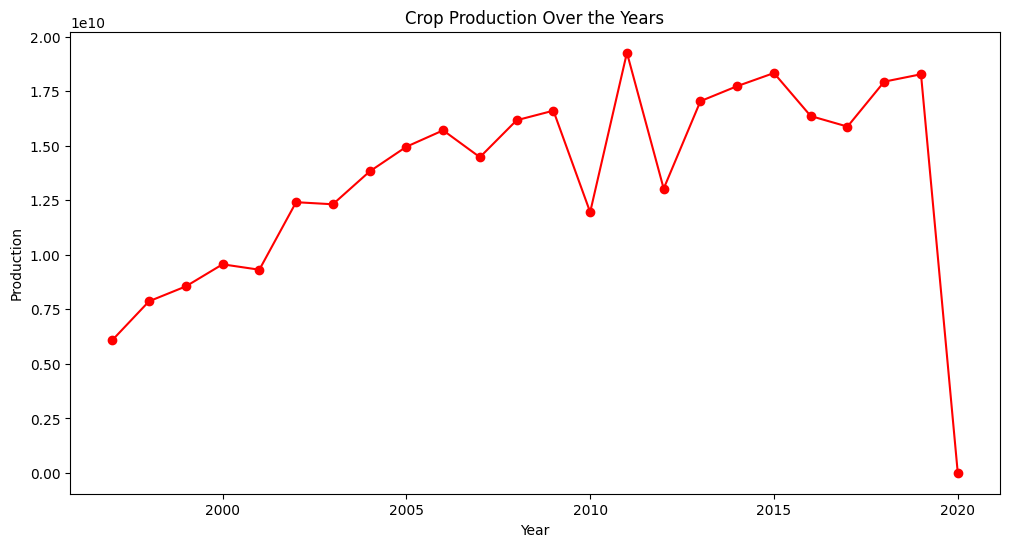

In [ ]:
# How does crop production change over the years?
year_prod = data.groupby('Crop_Year')['Production'].sum()

plt.figure(figsize=(12,6))
plt.plot(year_prod.index,year_prod.values,marker='o',color='red')
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

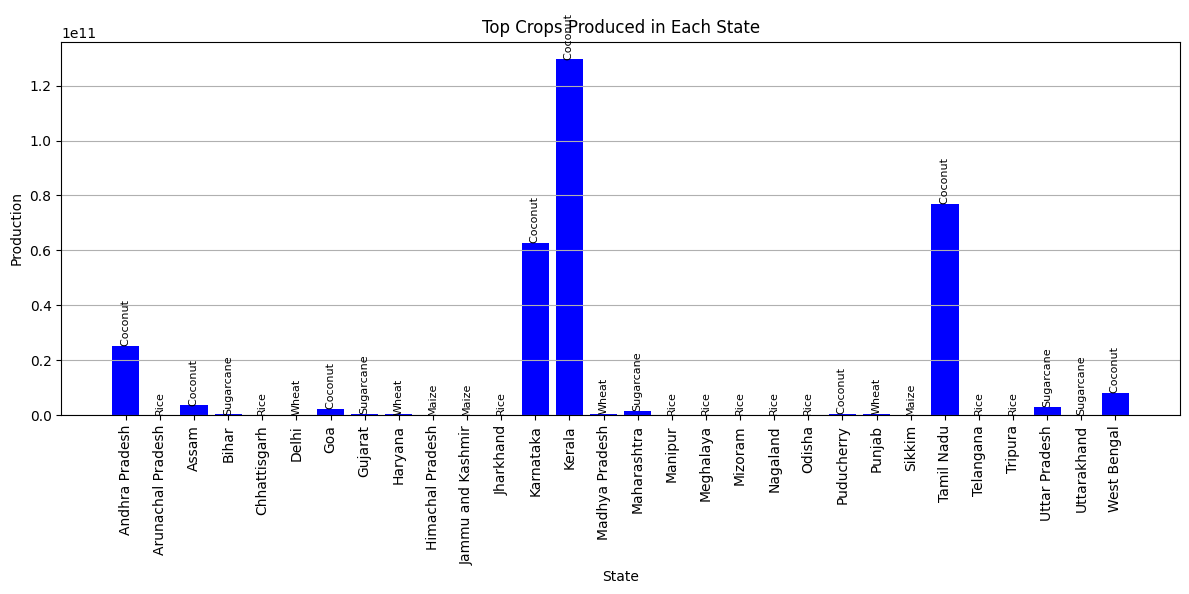

In [ ]:

#  What are the top crops produced in each state?
state_prod = data.groupby(['State','Crop'])['Production'].sum()
state_prod = state_prod.reset_index()
top_crops_in_states = state_prod.groupby('State').apply(lambda x: x.nlargest(1, 'Production'))
plt.figure(figsize=(12, 6))
bars = plt.bar(top_crops_in_states['State'], top_crops_in_states['Production'], color='b')
plt.title('Top Crops Produced in Each State')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Adding labels with crop names on top of the bars
for bar, crop_name in zip(bars, top_crops_in_states['Crop']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), crop_name,
             ha='center', va='bottom', rotation=90, fontsize=8, color='black')

plt.tight_layout()
plt.show()


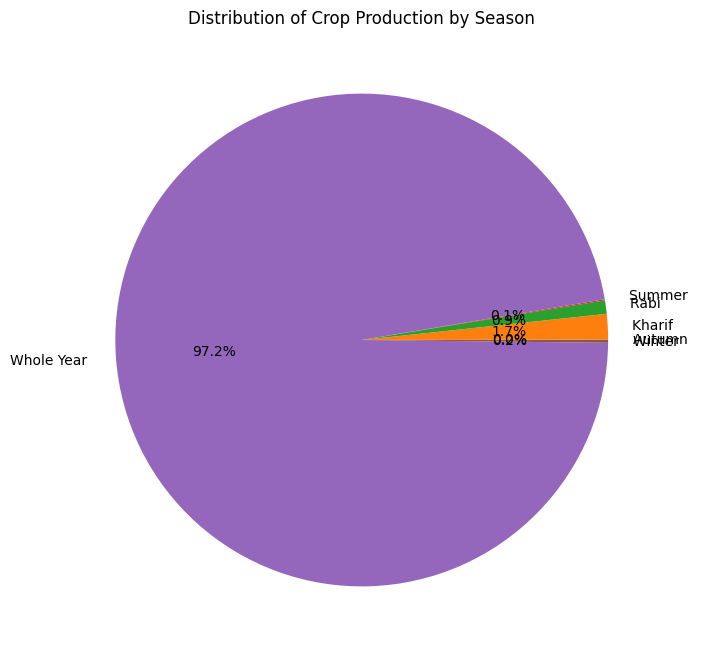

In [ ]:
# Distribution of crop production by year
season_prod = data.groupby('Season')['Production'].sum()
plt.figure(figsize=(8,8))
plt.pie(season_prod, labels=season_prod.index, autopct='%1.1f%%')
plt.title('Distribution of Crop Production by Season')
plt.show()


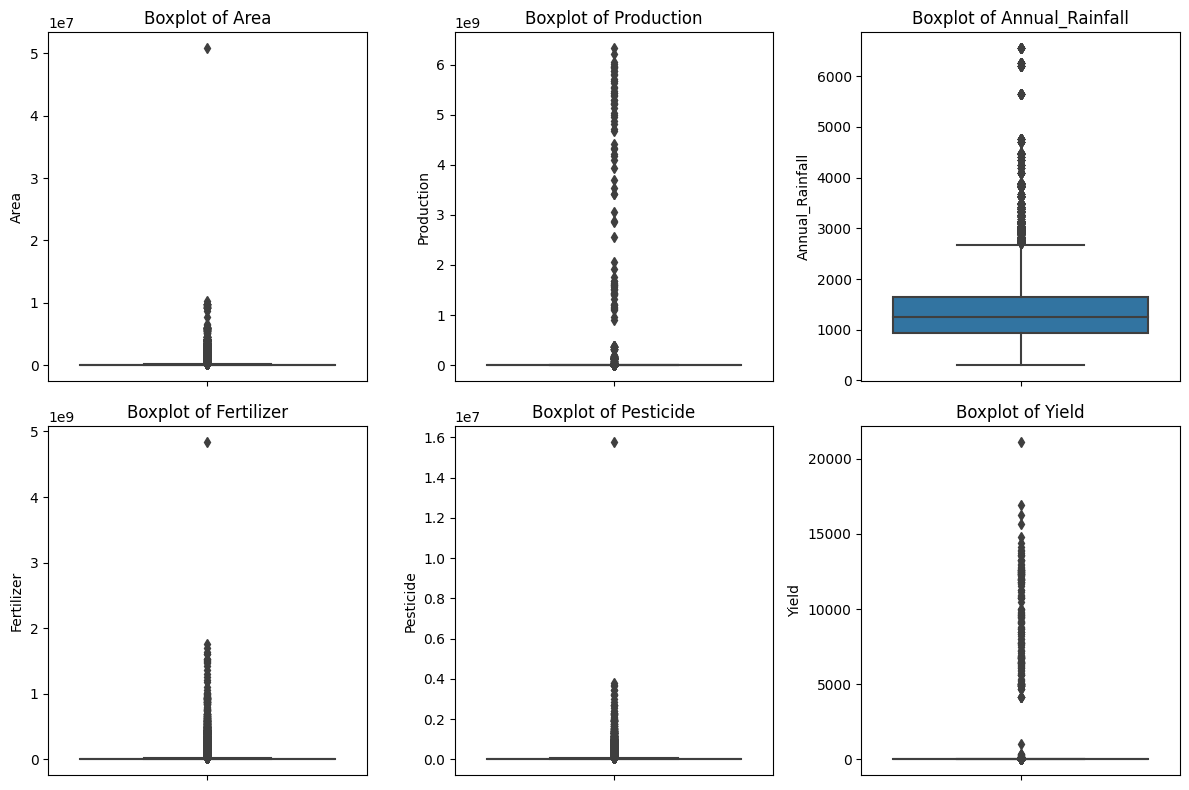

In [ ]:
# Numerical columns for outlier detection
numerical_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

# Convert columns to numeric if needed
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Part 1: Plot outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Part 2: Remove outliers
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the outliers
data_no_outliers = data.copy()
for col in numerical_cols:
    data_no_outliers = data_no_outliers[(data_no_outliers[col] >= lower_bound[col]) & (data_no_outliers[col] <= upper_bound[col])]



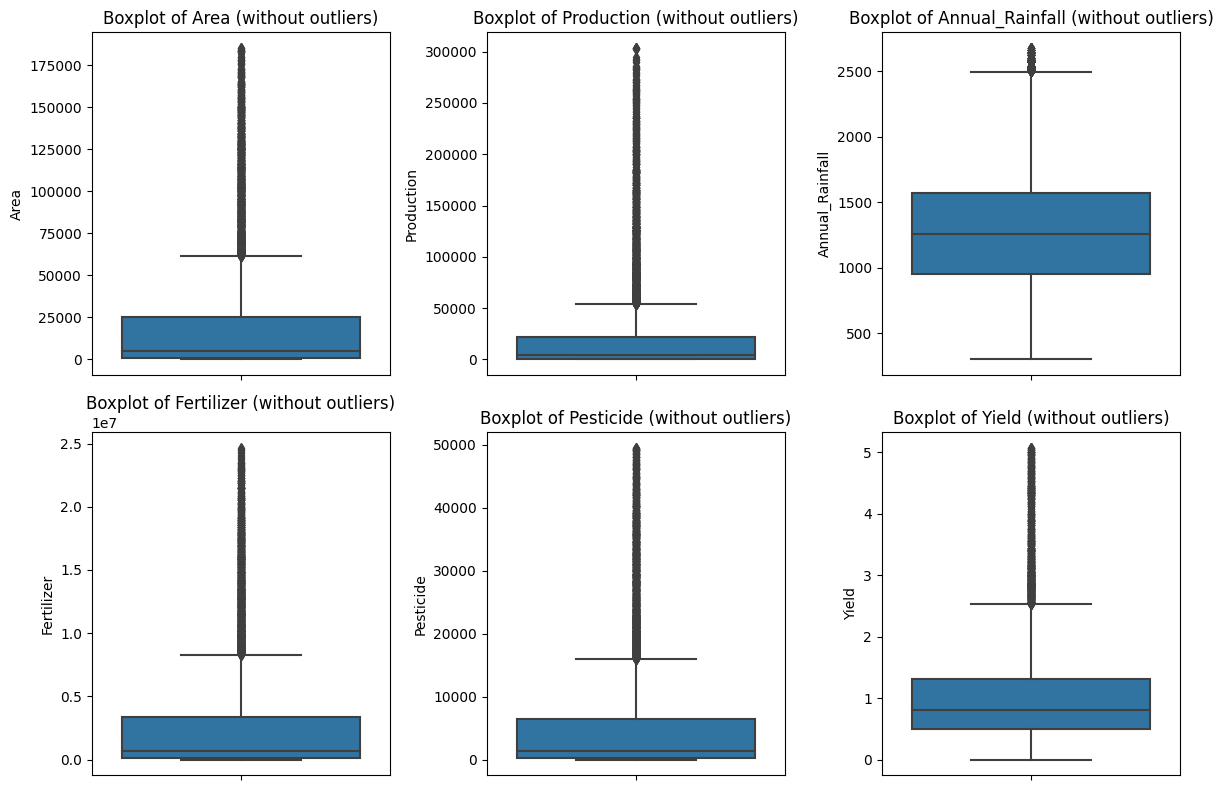

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data_no_outliers[col])
    plt.title(f'Boxplot of {col} (without outliers)')

plt.tight_layout()
plt.show()


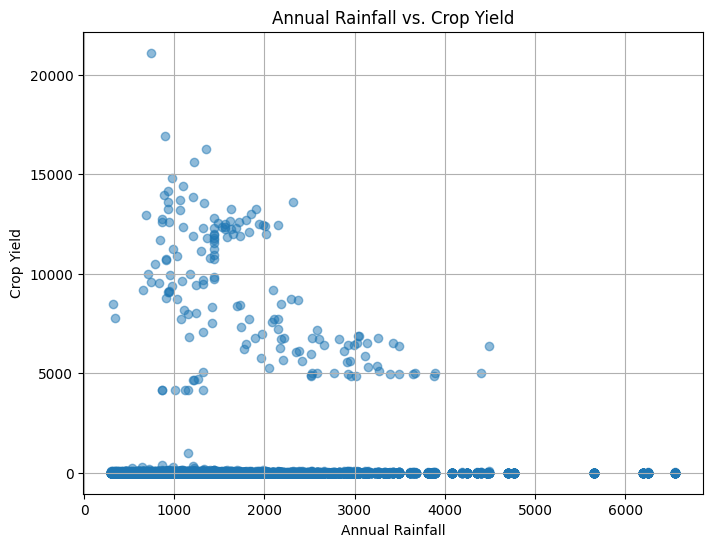

In [ ]:
# Create a scatter plot to visualize the relationship between annual rainfall and crop yield
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual_Rainfall'], data['Yield'], alpha=0.5)
plt.title('Annual Rainfall vs. Crop Yield')
plt.xlabel('Annual Rainfall')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()

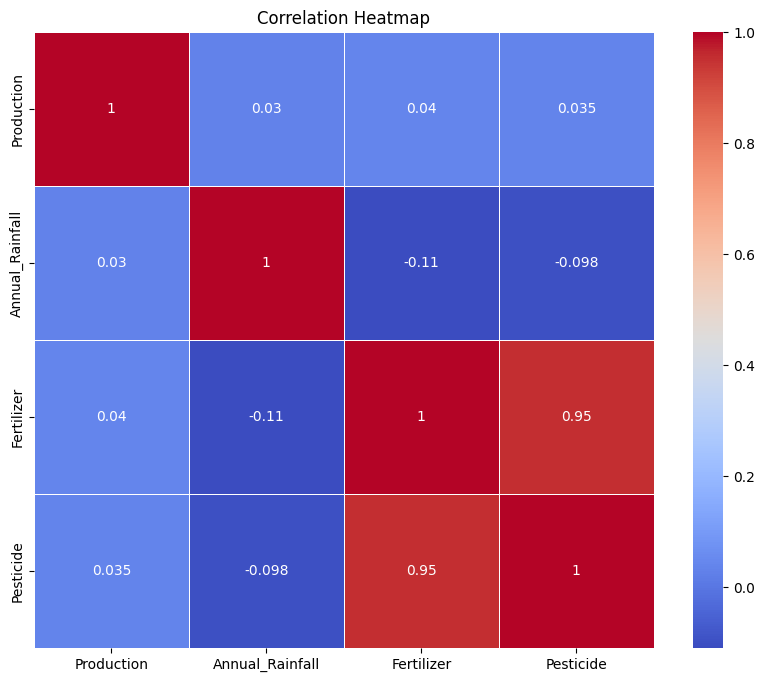

In [ ]:
# Select the columns you want to include in the correlation analysis
selected_columns = ['Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
selected_data = data[selected_columns]
correlation_matrix = selected_data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

# Label Encoding for 'State', 'Crop', and 'Season'
label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])
data['Crop'] = label_encoder.fit_transform(data['Crop'])
data['Season'] = label_encoder.fit_transform(data['Season'])


In [ ]:
# Scaling for numerical columns
scaler = StandardScaler()
numerical_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,-0.144802,-0.062267,0.751197,-0.179880,-0.121745,0.796087
1,1,1997,1,2,-0.236473,-0.062464,0.751197,-0.247217,-0.219385,0.710435
2,8,1997,1,2,-0.244443,-0.062482,0.751197,-0.253072,-0.227875,0.238333
3,9,1997,4,2,-0.218707,0.419954,0.751197,-0.234167,-0.200462,5238.051739
4,11,1997,1,2,-0.243157,-0.062479,0.751197,-0.252127,-0.226504,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,44,1998,1,19,-0.240071,-0.062475,0.073749,-0.249707,-0.223593,0.500000
19685,53,1998,2,19,-0.244165,-0.062471,0.073749,-0.252829,-0.227672,3.000000
19686,24,1997,1,10,0.178704,-0.060806,-0.099836,0.057755,0.222829,1.285000
19687,40,1997,1,10,0.130756,-0.062461,-0.099836,0.022534,0.171758,0.016667


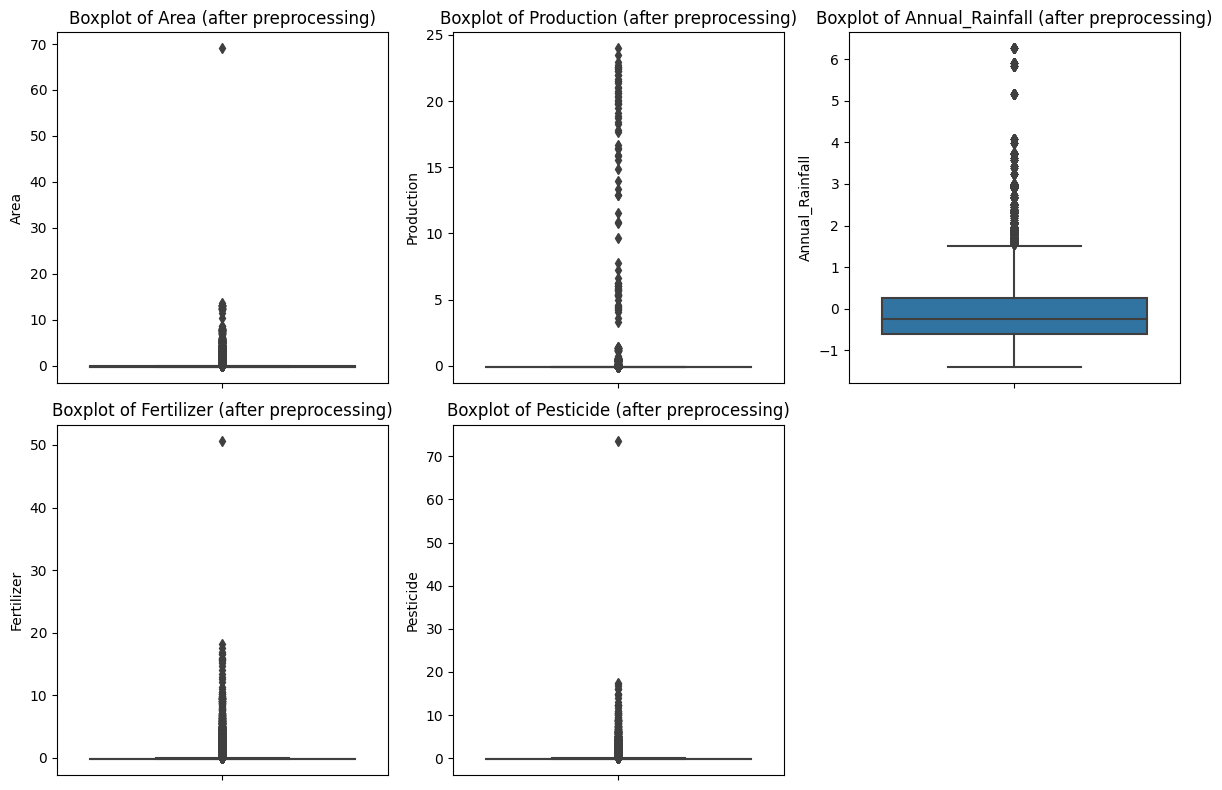

In [ ]:

# Create boxplots after preprocessing
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col} (after preprocessing)')

plt.tight_layout()
plt.show()

In [ ]:
# Split-out validation dataset
X = data.drop(columns=['Yield'])
y = data['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Create and train the LinearRegression (for regression)
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
# Calculate Mean Squared Error (MSE) and R-squared (accuracy for regression)
mse = mean_squared_error(y_test, y_pred)
r2_accuracy = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
# print("Confussion Matrix : ", confusion_matrix(y_pred,y_test) )
print("R-squared (Accuracy for LinearRegression):", r2_accuracy*100)


Mean Squared Error: 562818.2952116266
R-squared (Accuracy for LinearRegression): 31.738120235437883


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the DecisionTreeRegressor
regressor = Lasso(alpha=.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2_accuracy = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
# print("Confussion Matrix : ", confusion_matrix(y_pred,y_test) )
print("R-squared (Accuracy for Decision tree):", r2_accuracy*100)

Mean Squared Error: 562815.9443806005
R-squared (Accuracy for Decision tree): 31.738405357912068


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the DecisionTreeRegressor
regressor = Ridge(alpha=.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2_accuracy = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
# print("Confussion Matrix : ", confusion_matrix(y_pred,y_test) )
print("R-squared (Accuracy for Decision tree):", r2_accuracy*100)

Mean Squared Error: 562818.088011776
R-squared (Accuracy for Decision tree): 31.73814536584215


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2_accuracy = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
# print("Confussion Matrix : ", confusion_matrix(y_pred,y_test) )
print("R-squared (Accuracy for Decision tree):", r2_accuracy*100)

Mean Squared Error: 15605.775852694012
R-squared (Accuracy for Decision tree): 98.10724064240173


In [ ]:
# Create and train the RandomForestRegressor (for regression)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE) and R-squared (accuracy for regression)
mse = mean_squared_error(y_test, y_pred)
r2_accuracy = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
# print("Confussion Matrix : ", confusion_matrix(y_pred,y_test) )
print("R-squared (Accuracy for RandomForest):", r2_accuracy*100)


Mean Squared Error: 34008.967198597806
R-squared (Accuracy for RandomForest): 95.87519444627381


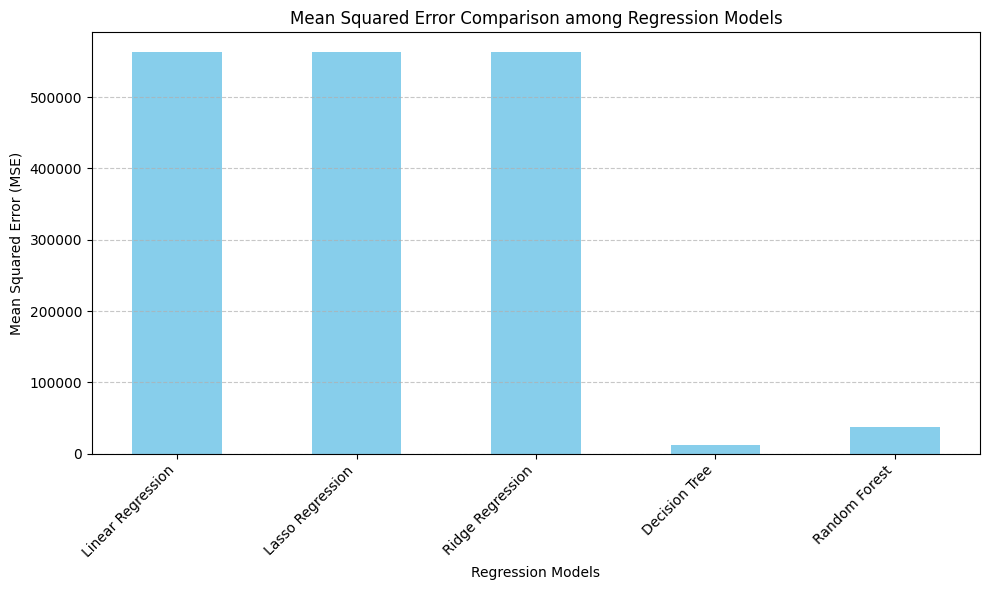

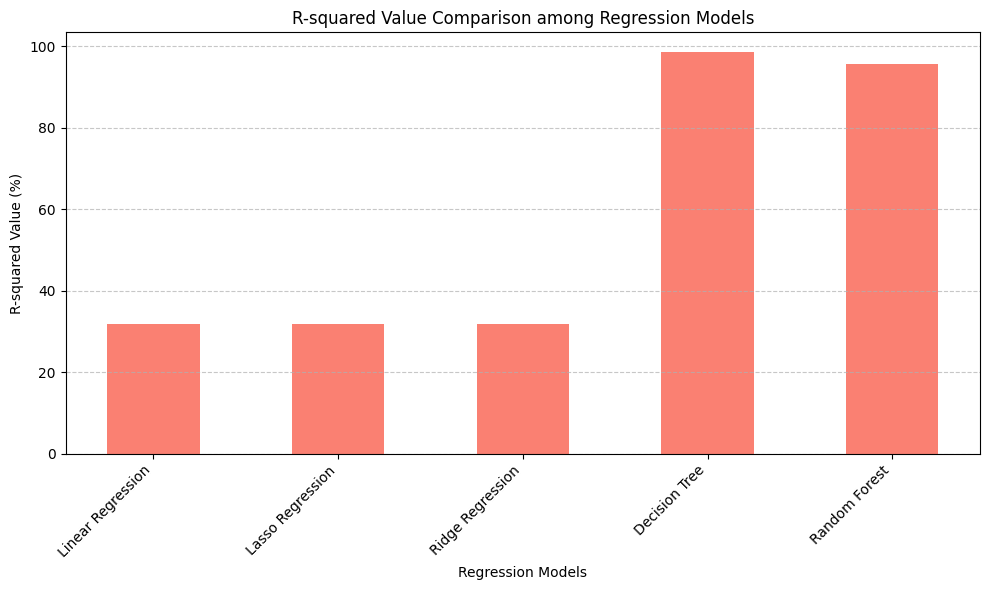

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest']

# MSE values
mse_values = [562860.11, 562815.94, 562818.09, 12395.22, 36717.99]

# R-squared values * 100 for percentage
r_squared_values = [31.73, 31.74, 31.74, 98.50, 95.55]

# Plotting MSE values
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue', width=0.5)
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error Comparison among Regression Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting R-squared values
plt.figure(figsize=(10, 6))
plt.bar(models, r_squared_values, color='salmon', width=0.5)
plt.xlabel('Regression Models')
plt.ylabel('R-squared Value (%)')
plt.title('R-squared Value Comparison among Regression Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
